<a href="https://colab.research.google.com/github/Zhi-704/ERL/blob/master/Tetris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install jumanji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.5/583.5 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for jumanji: filename=jumanji-0.3.1-py3-none-any.whl size=750386 sha256=11a7012eb2f8ac0350847c8e0b5cc74d2fd43f2db19e0d155a339b0da50893ee
  Stored in directory: /root/.cache/pip/wheels/31/29/10/884df072d319d2522cfff8b9c3d61fe60ab3c31e2a054d3e5d
Successfully built jumanji


In [2]:
import jumanji
import jax.numpy as jnp
import jax
import random
# import cv2
from collections import namedtuple, deque
# from itertools import count
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image
from time import sleep

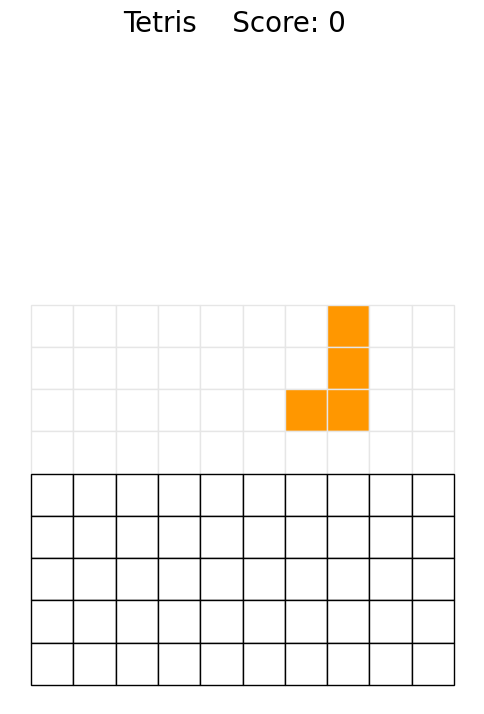

0.0
State(grid_padded=Array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32), grid_padded_old=Array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32), tetromino_index=Array(6, dtype=int32), old_tetromino_rotated=Array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 0]], dtype=int32), new_

In [ ]:
# Instantiate tetris environment using registry

env = jumanji.make('Tetris-v0', num_rows = 5, time_limit = 1000)

# Reset your (jit-able) environment
key = jax.random.PRNGKey(1)
state, timestep = jax.jit(env.reset)(key)

env.render(state)
print(state.reward)
print(state)

grid = state.grid_padded.flatten().tolist()
tetromino = state.tetromino_index.flatten().tolist()
print(grid)
print(tetromino)
obs_variable = np.asarray(grid+tetromino)
print(np.shape(obs_variable))
print(obs_variable)

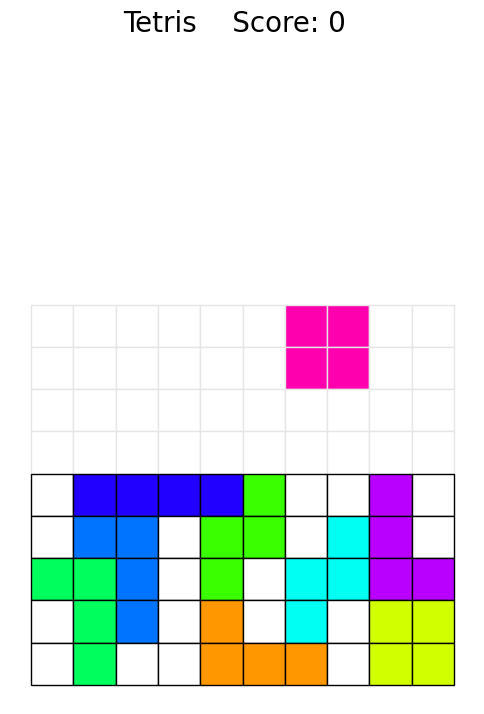

[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]


In [ ]:
action = env.action_spec().generate_value()          # Action selection (dummy value here)

num_actions = state.action_mask.shape[0] * state.action_mask.shape[1]

while not done:
  array = np.array(state.action_mask)
  # Flatten the array
  flattened_array = array.flatten()
  # Get the indices of True values
  true_indices = np.where(flattened_array)[0]
  random_index = np.random.choice(true_indices)
  # Convert the random index to two-dimensional coordinates
  row_index, col_index = np.unravel_index(random_index, array.shape)
  action = [row_index, col_index]

  state, timestep = jax.jit(env.step)(state, action)   # Take a step and observe the next state and time step

  env.render(state)

print(state.action_mask)

# env.render(state)
# print(array)
# print("LINE1")
# print(flattened_array)
# print("LINE2")
# print(true_indices)
# print("LINE3")
# print(row_index, col_index)
# print("LINE4")
# print(state.reward)
# print(state.grid_padded)
# print(state.new_tetromino)

tetromino = state.tetromino_index.flatten()



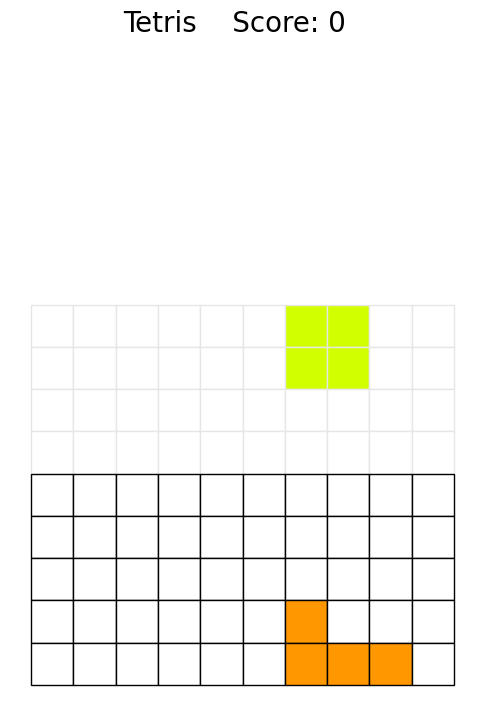

In [ ]:
env.render(state)

In [ ]:
def get_action(state):
  array = np.array(state.action_mask)
  # Flatten the array
  flattened_array = array.flatten()
  # Get the indices of True values
  true_indices = np.where(flattened_array)[0]
  if len(true_indices) == 0:
   return False
  random_index = np.random.choice(true_indices)
  # Convert the random index to two-dimensional coordinates
  rotation, col_index = np.unravel_index(random_index, array.shape)
  return [rotation,col_index]

In [ ]:
# Parameters for algorithm and agents generated
epsilon = 0.01
discount_factor = 0.99
learning_rate = 0.20
planningsteps = 0

def get_valid_actions(state):
  array = np.array(state.action_mask)
  # Flatten the array
  flattened_array = array.flatten()
  # Get the indices of true values, which are the number of valid actions in the current state
  true_indices = np.where(flattened_array)[0]

  return true_indices

def choose_action(Qvalues,state, state_tuple):
  # # Makes sure the algorithm does not always pick the first index if all index values are the same
  # if np.all(Qvalues[state] == Qvalues[state][0]):
  #   return [(np.random.randint(0,3)), (np.random.randint(0,9))]
  valid_actions = get_valid_actions(state)
  if len(valid_actions) == 0:
    return False
  # Choose action with epsilon-greedy policy
  if np.random.uniform(0,1) < epsilon:
    action_index = np.random.choice(valid_actions, size = 1)
  else:
    # Access array associated with the state key and find the index of the maximum value
    index_with_highest_Q_value = np.argmax(Qvalues[state_tuple][:, 1])
    # Take only the valid action
    action_index = Qvalues[state_tuple][index_with_highest_Q_value, 0]

  # Convert the action index to two-dimensional coordinates
  rotation, col_index = np.unravel_index(action_index, array.shape)

  return [rotation, col_index], action_index


def Qalgorithm(Qvalues):

  # Initialises environment and rewards
  rewards = []
  # Reset your (jit-able) environment
  key = jax.random.PRNGKey(0)
  state, timestep = jax.jit(env.reset)(key)
  state_tuple = tuple(state)

  env.render(state)

  valid_actions = get_valid_actions(state)

  # Adds new state to Q values tables and model
  if state_tuple not in Qvalues:
    corresponding_array = [[x, 0] for x in valid_actions]
    Qvalues.update({state_tuple: corresponding_array})

  print("STATE UPDATED FIRST")
  print(Qvalues[state_tuple])

  while True:

    # Chooses max value action and takes the action
    chosen_action, action_index = choose_action(Qvalues, state, state_tuple)
    print("ACTION CHOSEN")
    # next_state, reward, terminal = env.step(chosen_action)
    next_state, timestep = jax.jit(env.step)(state, chosen_action)
    next_state_tuple = tuple(next_state)
    curr_reward = next_state.reward

    print("NEXT STATE UPDATED")

    new_valid_actions = get_valid_actions(next_state)
    # Adds new state to Q values and Model
    if next_state_tuple not in Qvalues:
      corresponding_array2 = [[x,0] for x in new_valid_actions]
      Qvalues.update({next_state_tuple: corresponding_array2})

    print("NEXT STATE UPDATED SECOND")
    print(Qvalues[next_state_tuple])

    # Adds reward to prior reward
    rewards.append(curr_reward)

    # Locates action index
    chosen_action_index = np.where(Qvalues[state_tuple][:,0] == action_index)[0]

    # Updates Q value table
    Qvalues[state_tuple][chosen_action_index][1] += learning_rate * (curr_reward + discount_factor * np.max(Qvalues[next_state_tuple][:, 1]) - Qvalues[state_tuple][chosen_action_index][1])
    print("Q VALUE UPDATED")
    print(Qvalues[state_tuple])
    # Ends episode once terminal state is reached
    if chosen_action is False:
        break

    print("TERMINAL PASSED")
    state = next_state
    state_tuple = next_state_tuple

    time.sleep(3)

    env.render(state)


  return sum(rewards)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def RandomAgent():
  key = jax.random.PRNGKey(0)
  state, timestep = jax.jit(env.reset)(key)

  for i in range(50):
    action = get_action(state)
    print(action)
    if action == False:
      key = jax.random.PRNGKey(0)
      state, timestep = jax.jit(env.reset)(key)
      print("Environment Reset")
      continue
    state, timestep = jax.jit(env.step)(state, action)
    env.render(state)

RandomAgent()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: ignored

In [ ]:
num_of_agents = 1

def generateagent(episodes):
  # Resets Q values and Model table
  Qvalues = {}
  # Generates an agent that follows QLearning for a number of episodes
  total_rewards = np.zeros(episodes)
  for i in range(len(total_rewards)):
      total_rewards[i] = Qalgorithm(Qvalues)
  return total_rewards


# modified_agent_rewards = []
# for i in range(num_of_agents):
#   agent = generateagent()
#   print("Agent",i+1, "has been generated")
#   modified_agent_rewards.append([])
#   modified_agent_rewards[i].extend(agent)

# print("ALL AGENTS HAVE BEEN GENERATED")

In [ ]:
episodes = 3

total_rewards, Qvalues = generateagent(episodes)

# Plot the rewards over episodes
plt.plot(range(1, episodes + 1), total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Agent Performance over Episodes')
plt.grid(True)
plt.show()

In [ ]:
'''
1- Initialize replay memory capacity.
2- Initialize the policy network with random weights.
3- Clone the policy network, and call it the target network (target_model).
4- For each episode:
    1. Initialize the starting state.
    2. For each time step:
        1- Select an action.
            - Via exploration or exploitation, which depends on epsilon.
        2- Execute selected action in an emulator (the environment).
        3- Observe reward and next state.
        4- Store experience in replay memory.
        5- Sample random batch from replay memory.
        6- Preprocess states from batch (normalization).
        7- Pass batch of preprocessed states to policy network.
        8- Calculate loss between output Q-values and target Q-values.
            - Requires a pass to the target network for the next state
        9- Gradient descent updates weights in the policy network to minimize loss.
            - After x time steps, weights in the target network are updated to the weights in the policy network.
  '''

In [ ]:

if torch.cuda.is_available():
  print("Using GPU")
  FloatTensor = torch.cuda.FloatTensor
  LongTensor = torch.cuda.LongTensor
  ByteTensor = torch.cuda.ByteTensor
  num_episodes = 600
else:
  print("Using CPU")
  FloatTensor = torch.FloatTensor
  LongTensor = torch.LongTensor
  ByteTensor = torch.ByteTensor
  num_episodes = 1

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

# Replay buffer to store experience
class ReplayMemory(object):

    def __init__(self, capacity):
      self.capacity = capacity
      self.memory = deque([], maxlen=capacity)
      self.position = 0

    def push(self, *args):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

class DQN(nn.Module):

    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# EPS_START is the starting value of epsilon
# EPS_END is the final value of epsilon
# EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
# TAU is the update rate of the target network
# LR is the learning rate of the ``AdamW`` optimizer
BATCH_SIZE = 64
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 800
TAU = 0.005
LR = 1e-4

# Get number of actions from gym action space
n_actions = env.action_space.n
# Get the number of state observations
state, info = env.reset()
n_observations = len(state)

policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
memory = ReplayMemory(10000)


steps_done = 0


def select_action(state):
    global steps_done

    # Random number generated to decide whether to explore or exploit
    sample = random.random()

    # Epsilon threshold calculated as a function of epsilon decay over steps done
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1

    # Get valid actions from current state
    valid_actions = get_valid_actions(state)
    array = np.array(state.action_mask)

    if sample > eps_threshold:
      with torch.no_grad():
        # Get the Q-values for each action in the state
        # NEED TO FIX
        q_values = policy_net(state)[valid_actions]
        # Find the action index with the maximum Q-value
        action_index = valid_actions[q_values.argmax()]
        # Convert the action index to the corresponding rotation and column
        rotation, col_index = np.unravel_index(action_index, array.shape)
        return torch.tensor([[rotation, column]], device=device, dtype=torch.long)
    else:
      # Randomly sample an action from the environment's action space
      action_index = np.random.choice(valid_actions, size = 1)
      # Convert the action index to two-dimensional coordinates
      rotation, col_index = np.unravel_index(action_index, array.shape)
      return torch.tensor([[rotation, col_index]], device=device, dtype=torch.long)


In [ ]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0]
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()

In [ ]:
episode_durations = []


def plot_durations(show_result=False):
    plt.figure(1)
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

In [15]:
class ReplayBuffer:

  def __init__(self):
    self.memory = deque(maxlen=1000)
    self.capacity = 1000

  def __len__(self):
    return len(self.memory)

  def store(self, state, next_state, reward, action, done):
    '''
    Records a single step of game play experience
    PARAM -
    state: current game state
    next_state: game state after taking action
    reard: reward taking action at the current state brings
    action: action taken at the current state
    done: boolean to indicate if game is finished after taking action
    RETURNS - N/A
    '''
    if len(self.memory) > self.capacity:
      del self.memory[0]
    self.memory.append((state, next_state, reward, action, done))


  def sample(self):
    '''
    Samples a batch of gameplay experiences for training
    PARAM - None
    RETURNS - list of gameplay experiences
    '''
    batch_size = min(128, len(self.memory))
    sample_batch = random.sample(self.memory, batch_size)
    state_batch = []
    next_state_batch = []
    reward_batch = []
    action_batch = []
    done_batch = []
    for experience in sample_batch:
      state_batch.append(experience[0])
      next_state_batch.append(experience[1])
      reward_batch.append(experience[2])
      action_batch.append(experience[3])
      done_batch.append(experience[4])

    return  np.array(state_batch), np.array(next_state_batch), np.array(reward_batch), np.array(action_batch), np.array(done_batch)

In [21]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow import keras

class DqnAgent:
  '''

  '''

  def __init__(self):
    self.q_net = self.build_dqn_model()
    self.target_q_net = self.build_dqn_model()

  @staticmethod
  def build_dqn_model():
    '''
    Builds deep neural network to predict Q values for all possible actions given a state.
    Input should have shape of the state and the output should have the same shape as action space
    RETURNS - Q network
    '''
    q_net = Sequential()
    # Adds fully connected layer with 128 units and uses rectified linear unit activation function. he_uniform initliazes weight of layer
    q_net.add(Dense(128, input_dim = 105, activation='relu', kernel_initializer='he_uniform'))
    q_net.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    q_net.add(Dense(40, activation='linear', kernel_initializer='he_uniform'))

    # opt = keras.optimizers.Adam(learning_rate=0.001)
    q_net.compile(loss='mse', optimizer = 'adam')
    return q_net

  def convert_state(self,state):
    '''
    Convert state into observation variable that can be passed into neural network
    PARAM -
    state: current game state
    RETURNS - observation variable
    '''

    grid = state.grid_padded.flatten().tolist()
    tetromino = state.tetromino_index.flatten().tolist()
    # print(grid)
    # print(tetromino)
    obs_variable = np.asarray(grid+tetromino)
    # print("Current input dimensions:")
    # print(np.shape(obs_variable))
    # print(obs_variable)

    return obs_variable


  def policy(self,state):
    '''
    Takes state from environment and returns an action that has the highest q value using epsilon_greedy
    PARAM -
    state: current game state
    RETURNS - action
    '''
    # Matches state into 105, array
    state_array = self.convert_state(state)
    # Convert to into tensorflow tensor
    state_input = tf.convert_to_tensor(state_array[None, :], dtype=tf.float32)
    # Grabs Q values for all possible actions in current state
    action_q = self.q_net(state_input)

    action_mask = np.array(state.action_mask).flatten()

    valid_q_values = action_q * action_mask
    # Set elements that are zero to -999
    valid_q_values = np.where(valid_q_values == 0, -999, valid_q_values)

    print("ACTION MASK")
    print(action_mask)
    print("CORRESPONDING Q VALUES")
    print(valid_q_values)
    # print(np.shape(valid_q_values))
    true_indices = self.get_valid_actions(state)
    print(true_indices)
    if len(true_indices) == 0:
      return False, False
    else:
      action_index = np.argmax(valid_q_values, axis=1)[0]
      # Convert action into acceptable type
      array = np.array(state.action_mask)
      rotation, col_index = np.unravel_index(action_index, array.shape)
      action = [rotation, col_index]
      return action, action_index

  def get_valid_actions(self,state):
    array = np.array(state.action_mask)
    # Flatten the array
    flattened_array = array.flatten()
    # Get the indices of true values, which are the number of valid actions in the current state
    true_indices = np.where(flattened_array)[0]

    return true_indices

  def random_action(self, state):
    array = np.array(state.action_mask)
    true_indices = self.get_valid_actions(state)
    if len(true_indices) == 0:
      return False
    random_index = np.random.choice(true_indices)
    # Convert the random index to two-dimensional coordinates
    rotation, col_index = np.unravel_index(random_index, array.shape)
    return [rotation,col_index]

  def update_network(self):
    '''
    Updates current q network with q_net which brings all the training in q_net with target_q_net
    '''
    self.target_q_net.set_weights(self.q_net.get_weights())

  def train(self,batch):
    '''
    Trains underlying network with batch of gameplay experineces to help it predict Q values
    PARAM -
    Batch: batch of experiences
    RETURNS: Traning loss
    '''
    # Copying the batch over
    state_batch, next_state_batch, reward_batch, action_batch, done_batch = batch

    print(state_batch)
    print(next_state_batch)
    print("REWARD")
    print(reward_batch)
    print("ACTION")
    print(action_batch)
    print(done_batch)

    # Running states through the q_net gives output Q values for the states
    current_q = self.q_net(state_batch).numpy()
    print("Printing current q")
    print(current_q)
    # Copy over Q values for actions that weren't chosen
    target_q = np.copy(current_q)
    print("Printing target q")
    print(np.shape(target_q))
    # Get the max Q values of states after transition by running next_state through target_q_net and take max Q values for all actions for each sample
    next_q = self.target_q_net(next_state_batch).numpy()
    max_next_q = np.amax(next_q, axis=1)
    print("Entering loop")
    print("Printing next q")
    print(next_q)
    print("Printing max next q")
    print(max_next_q)
    # Update Q value of action taken with max Q value of next state plus intermediate reward from the action taken
    for i in range(state_batch.shape[0]):
      target_q_val = reward_batch[i].astype(float)
      action_index = action_batch[i]
      print(action_index)
      if not done_batch[i]:
        target_q_val += 0.95 * max_next_q[i]
      target_q[i][action_index] = target_q_val
    print("Finishing loop")
    # Train q_net with target Q values
    training_his = self.q_net.fit(x = state_batch, y=target_q)
    loss = training_his.history['loss']
    print("Exiting train")
    return loss


In [20]:
def evaluate_training(env, agent):
  '''
  Evaluates performance of DQN agent and calculates average reward
  PARAM -
  env: game environment
  agent: DQN agent
  RETURNS: Average reward across episodes
  '''
  total_reward = 0.0
  episodes_to_play = 6
  for i in range(episodes_to_play):
    key = jax.random.PRNGKey(1)
    state, timestep = jax.jit(env.reset)(key)
    done = False
    episode_reward = 0.0
    while not done:
      action, action_index = agent.policy(state)
      if action is False:
        done = True
        break
      next_state, next_timestep = jax.jit(env.step)(state, action)
      episode_reward += next_state.reward
      state = next_state
    total_reward += episode_reward
  average_reward = total_reward / episodes_to_play
  return average_reward

def collect_experiences(env, agent, buffer):
  '''
  Collect gameplay experiences by playing with env and store experiences in buffer
  '''
  key = jax.random.PRNGKey(1)
  state, timestep = jax.jit(env.reset)(key)
  done = False
  terminal = False


  print("Entering Loop")
  while not done:
    action, action_index = agent.policy(state)
    print(action)
    # Testing
    #action = agent.random_action(state)
    if action is False:
      done = True
      terminal = True
      break
    print(state.action_mask)
    print(action)
    next_state, next_timestep = jax.jit(env.step)(state, action)
    print("Action taken")
    # env.render(state)
    print(action)
    buffer.store(agent.convert_state(state), agent.convert_state(next_state), next_state.reward, action_index, terminal)
    state = next_state

    # sleep(5)

    env.render(state)

def train_model(max_episodes = 10):
  '''
  Trains DQN agent to play game
  RETURNS: None
  '''

  agent = DqnAgent()
  buffer = ReplayBuffer()
  # Instantiate tetris environment using registry
  env = jumanji.make('Tetris-v0', num_rows = 5, time_limit = 1000)
  # env = jumanji.make('Tetris-v0')


  for episode_cnt in range(max_episodes):
    collect_experiences(env, agent, buffer)
    gameplay_batch = buffer.sample()
    loss = agent.train(gameplay_batch)
    print('So far the loss is {0}'.format(loss))
    avg_reward = evaluate_training(env, agent)
    print('So far the performance is {0}'.format(avg_reward))
    # Update target q net every __ episodes (currently 2)
    if episode_cnt % 2 == 0:
      agent.update_network()
#    sleep(5)


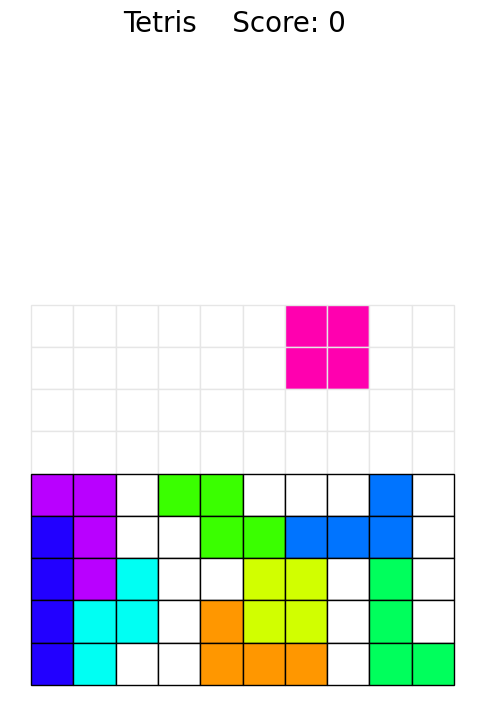

ACTION MASK
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
CORRESPONDING Q VALUES
[[-999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
  -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
  -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
  -999. -999. -999. -999.]]
[]
False
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 5]
 [0 0 0 ... 0 0 3]
 ...
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 5]
 [0 0 0 ... 0 0 6]]
[[0 0 0 ... 0 0 5]
 [8 8 8 ... 0 0 3]
 [0 0 0 ... 0 0 2]
 ...
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 3]]
REWARD
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [22]:
train_model()
print('No problems')

# New Section